<a href="https://colab.research.google.com/github/ivansaputrazebua/Pemograman_Python_1101184447/blob/main/Assignment10_Ivan%20Saputra%20Zebua_1101184447.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
cd /content/drive/MyDrive/python project

/content/drive/MyDrive/python project


In [9]:
#import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [12]:
# grab all image paths in the input datashet directory, then initialize 
# our list of images and coressponding class labels
print("[info] loading images...")
imagePaths = paths.list_images("3scene")
data = []
labels = []


[info] loading images...


In [16]:
# loop over our input images
for imagePath in imagePaths:
  # load the input image from disk, resize it to 64x64 pixels, scale the pixel
  # intensities to the range [0, 1], and the update our images list
  image = Image.open(imagePath)
  image = np.array(image.resize((64, 64))) / 255.0
  data.append(image)

  # extract the class label from the file path and update the label list
  label = imagePath.split(os.path.sep)[-2]
  labels.append(label)

In [19]:
print(labels)

[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [18]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [21]:
# perform a training and testing split, using 75% of the data for training and
# 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data), np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(710, 64, 64, 3)
(237, 64, 64, 3)


In [23]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
      Flatten(input_shape=(64*64*3,)),
      Dense(100, activation="relu", name="layer1"),
      Dense(16, activation="relu", name="layer2"),
      Dense(16, activation="relu", name="layer3"),
      Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 12288)             0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               1228900   
_________________________________________________________________
layer2 (Dense)               (None, 16)                1616      
_________________________________________________________________
layer3 (Dense)               (None, 16)                272       
_________________________________________________________________
layer4 (Dense)               (None, 3)                 51        
Total params: 1,230,839
Trainable params: 1,230,839
Non-trainable params: 0
_________________________________________________________________


In [29]:
# train the model kusing the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=100)

[INFO] training network...
Epoch 1/25
8/8 [==============================] - 0s 39ms/step - loss: 0.9769 - accuracy: 0.6521 - val_loss: 0.8574 - val_accuracy: 0.6582
Epoch 2/25
8/8 [==============================] - 0s 23ms/step - loss: 0.5906 - accuracy: 0.7563 - val_loss: 0.7481 - val_accuracy: 0.7257
Epoch 3/25
8/8 [==============================] - 0s 22ms/step - loss: 0.4007 - accuracy: 0.8521 - val_loss: 0.6461 - val_accuracy: 0.7553
Epoch 4/25
8/8 [==============================] - 0s 23ms/step - loss: 0.3869 - accuracy: 0.8761 - val_loss: 0.5837 - val_accuracy: 0.7806
Epoch 5/25
8/8 [==============================] - 0s 22ms/step - loss: 0.3577 - accuracy: 0.8817 - val_loss: 0.6087 - val_accuracy: 0.7468
Epoch 6/25
8/8 [==============================] - 0s 24ms/step - loss: 0.3279 - accuracy: 0.8972 - val_loss: 0.6074 - val_accuracy: 0.7637
Epoch 7/25
8/8 [==============================] - 0s 23ms/step - loss: 0.3319 - accuracy: 0.8746 - val_loss: 0.6012 - val_accuracy: 0.7890


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


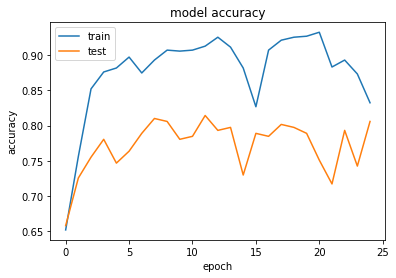

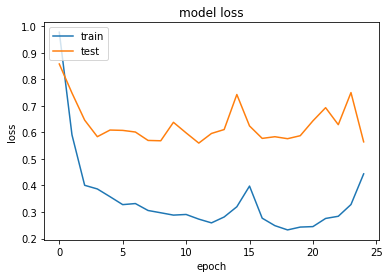

In [32]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=100)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       coast       0.79      0.87      0.83        90
      forest       0.88      0.82      0.85        89
     highway       0.73      0.69      0.71        58

    accuracy                           0.81       237
   macro avg       0.80      0.79      0.79       237
weighted avg       0.81      0.81      0.81       237



In [34]:
model.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [49]:
import cv2
import matplotlib.pyplot as plt
image1='Copy of forest_text11.jpg'

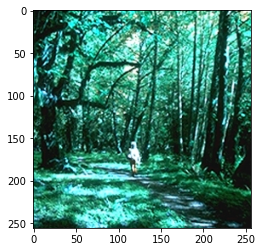

In [50]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
#print(type(image_array))

In [51]:
image_testing = Image.open('Copy of forest_text11.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [52]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [53]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[3.7686934e-04 9.9901068e-01 6.1238441e-04]]
['forest']
